# Plots of extreme indices

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation
import math # to use the floor function when changing axis labels

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
import Extreme_indices_functions as funcX
# import obs_functions as funcO

In [3]:
# define path where obs data is store
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [4]:
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{path}Daily_T_Aus_5S.nc')
daily_T

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [5]:
# take the monthly mean temperature
mon_mean_T = daily_T.resample(time='M').mean(dim='time')

In [6]:
# Krakatoa years
# eruption date
e_date = pd.to_datetime(['1883-08','1902-10', '1963-03', '1982-04', '1991-06'])
# save arrays of times relative to each eruption
e_pre5yrs = e_date - 60 * pd.offsets.MonthBegin()
e_post5yrs = e_date + 61 * pd.offsets.MonthBegin()

In [7]:
# select out 10 years around Krakatoa
K_daily_T = daily_T.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))
K_mon_mean_T = mon_mean_T.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))

In [8]:
# take the multi_station mean
K_msm_T = K_mon_mean_T.mean(dim='station')

In [9]:
# open netcdf of extreme indices
ex_index = xr.open_dataset(f'{path}Obs_extreme_indices.nc')
ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 516)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-31 1878-02-28 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables: (12/14)
    FD       (station, time) int64 ...
    SU       (station, time) int64 ...
    ID       (station, time) int64 ...
    TR       (station, time) int64 ...
    TXx      (station, time) float64 ...
    TNx      (station, time) float64 ...
    ...       ...
    TN10p    (station, time) float64 ...
    TX10p    (station, time) float64 ...
    TN90p    (station, time) float64 ...
    TX90p    (station, time) float64 ...
    DTR      (station, time) float64 ...
    ETR      (station, time) float64 ...

In [10]:
# take the 10 years around Krakatoa
K_ex_index = ex_index.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))
K_ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables: (12/14)
    FD       (station, time) int64 0 0 0 0 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 0 0 0
    SU       (station, time) int64 1 2 10 12 19 24 22 16 ... 10 11 10 5 0 0 0 0
    ID       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TR       (station, time) int64 0 0 1 4 2 8 7 7 1 0 0 ... 1 2 5 5 0 0 0 0 0 0
    TXx      (station, time) float64 26.2 26.6 30.9 40.1 ... 22.3 22.4 19.9 23.8
    TNx      (station, time) float64 14.5 14.7 20.6 23.0 ... 15.6 14.0 14.8 13.1
    ...       ...
    TN10p    (station, time) float64 29.03 3.333 3.226 0.0 ... 30.0 48.39 51.61
    TX10p    (station, time) float64 19.35 0.0 0.0 0.0 ... 13.33 29.03 29.03
    TN90p    (station, time) float64 0.0 0.0 3.226 13.33 ... 0.0 0.0 0.0 0.0
    TX90p    (station, time) float64 0.0 0.0 0.0 20.0 16.13 ... 0.0 0.0 0.0 0.0
    DTR      (station, time) float64 8.958 10.56 12.14 ... 7.237 7.677 8.803
    ETR      (station, time) float64 23.0 23.8 26.2 32.5 ... 16.4 16.9 15.8 20.0

In [11]:
# take the multi_station mean
K_msm_ex_index = K_ex_index.mean(dim='station')
K_msm_ex_index

<xarray.Dataset>
Dimensions:  (time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
Data variables: (12/14)
    FD       (time) float64 3.8 1.0 0.6 0.0 0.0 0.0 ... 0.8 1.4 4.8 4.2 5.8 7.4
    SU       (time) float64 0.4 1.4 7.6 11.8 14.8 19.6 ... 7.6 0.6 0.0 0.0 0.0
    ID       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    TR       (time) float64 0.0 0.0 0.2 1.0 1.6 3.4 ... 1.4 0.4 0.2 0.0 0.0 0.0
    TXx      (time) float64 23.32 26.84 29.64 37.44 ... 24.4 19.24 18.6 21.5
    TNx      (time) float64 12.0 15.82 16.0 18.08 ... 15.3 12.32 10.14 10.48
    ...       ...
    TN10p    (time) float64 19.35 8.046 1.29 0.0 0.0 ... 16.13 24.32 32.11 43.01
    TX10p    (time) float64 15.13 1.356 0.7143 0.0 ... 5.726 17.69 28.42 25.26
    TN90p    (time) float64 0.0 2.667 1.935 8.0 20.0 ... 4.667 1.29 0.0 0.0 0.0
    TX90p    (time) float64 0.0 2.069 4.832 20.96 24.12 ... 0.0 0.0 0.0 0.0
    DTR      (time) float64 9.14 9.767 11.62 12.02 ... 9.509 8.016 8.354 10.33
    ETR      (time) float64 21.04 23.78 24.52 30.12 ... 22.3 17.94 19.24 22.06

## Figures

In [12]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [16]:
blues = sns.color_palette("Blues_r")
greens = sns.color_palette("Greens_r")
reds = sns.color_palette("Reds_r")
oranges = sns.color_palette("Oranges_r")

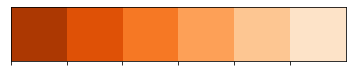

In [17]:
sns.palplot(sns.color_palette("Oranges_r"))

In [13]:
# use this to set the x-ticks for each month from 5 years before to 5 years after the eruption
months = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='MS')
years = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='YS')

In [14]:
fplot=reload(fplot)

# need elevation and latitude for each station 

## should have consistent labelling for max and min temp
## [Tmin and Tmax]  OR  [TX and TN]

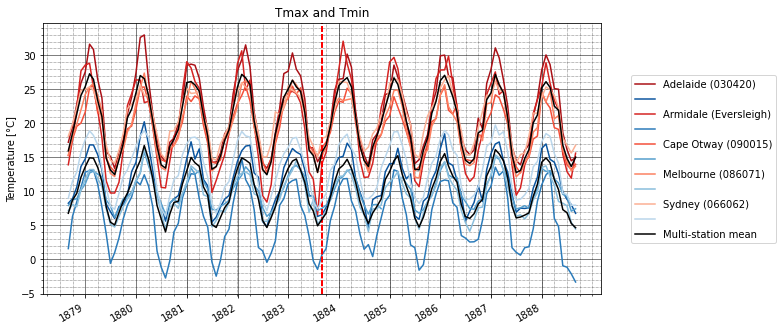

In [42]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_mon_mean_T.Tmax
ds2 = K_mon_mean_T.Tmin

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'Temperature [{deg}C]', title = 'Tmax and Tmin') 
    axes.set_xlabel(None)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_Tmax+Tmin+msm_stacked.png', dpi=300, bbox_inches='tight')

<ipython-input-43-50312c009d94>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(labels)


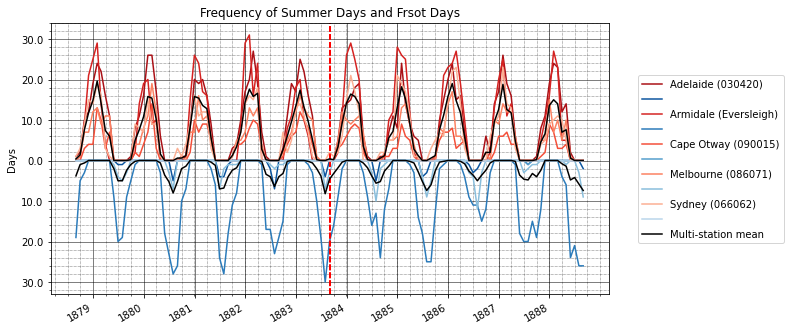

In [43]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.SU
ds2 = -K_ex_index.FD

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'Days', title = 'Frequency of Summer Days and Frsot Days') 
    axes.set_xlabel(None)
    
    # change the labels so that FD values are no longer listed as negative (basically inverse operation)
    labels = axes.get_yticks().tolist()
    for l in range(0,math.floor(len(labels)/2)):
        labels[l] = labels[-(1+l)]
    # set the new labels
    axes.set_yticklabels(labels)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_FD+SU+msm_stacked.png', dpi=300, bbox_inches='tight')

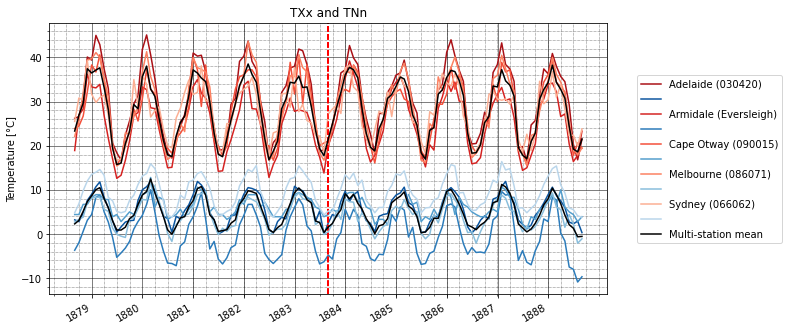

In [44]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.TXx
ds2 = K_ex_index.TNn

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'Temperature [{deg}C]', title = 'TXx and TNn') 
    axes.set_xlabel(None)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_TXx+TNn+msm_stacked.png', dpi=300, bbox_inches='tight')

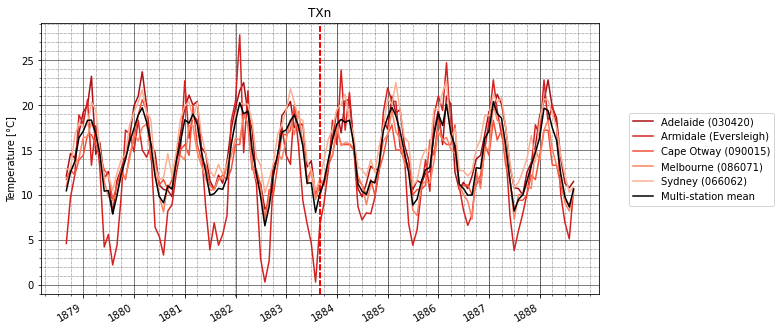

In [45]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.TXn
# ds2 = K_ex_index.TNx

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
#         ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
#     ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'Temperature [{deg}C]', title = 'TXn') 
    axes.set_xlabel(None)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_TXn+msm_stacked.png', dpi=300, bbox_inches='tight')

<ipython-input-46-0cd4ea97e0a7>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(labels)


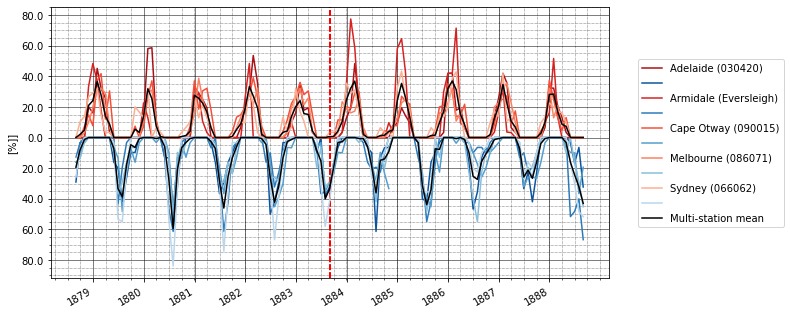

In [46]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.TX90p
ds2 = -K_ex_index.TN10p

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'[%]]', title = None) 
    axes.set_xlabel(None)
    
    # change the labels so that FD values are no longer listed as negative (basically inverse operation)
    labels = axes.get_yticks().tolist()
    for l in range(0,math.floor(len(labels)/2)):
        labels[l] = labels[-(1+l)]
    # set the new labels
    axes.set_yticklabels(labels)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined+TX90p+TN10p+msm_stacked.png', dpi=300, bbox_inches='tight')

<ipython-input-47-f2027dd4a440>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(labels)


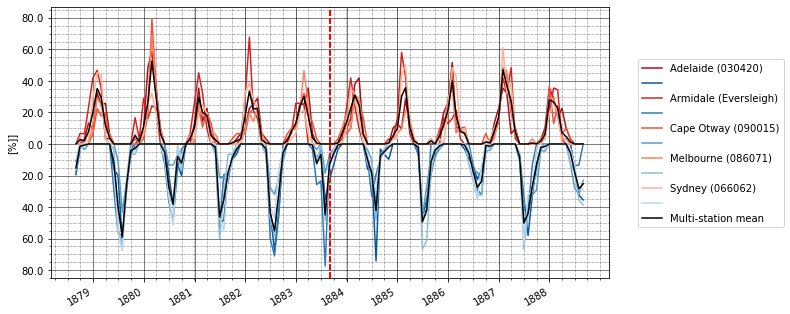

In [47]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.TN90p
ds2 = -K_ex_index.TX10p

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=blues[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'[%]]', title = None) 
    axes.set_xlabel(None)
    
    # change the labels so that FD values are no longer listed as negative (basically inverse operation)
    labels = axes.get_yticks().tolist()
    for l in range(0,math.floor(len(labels)/2)):
        labels[l] = labels[-(1+l)]
    # set the new labels
    axes.set_yticklabels(labels)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_TN90p+TX10p+msm_stacked.png', dpi=300, bbox_inches='tight')

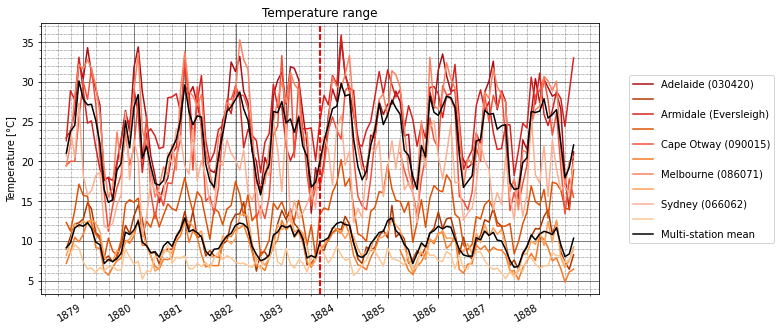

In [48]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5)) # make a figure

ds = K_ex_index.ETR
ds2 = K_ex_index.DTR

with dask.diagnostics.ProgressBar():
    
    for i, s in enumerate(ds.station):
        dplot = ds.sel(station=s)
        fplot.timeseries_noP(dplot, ax = axes, color=reds[i], label = s.data)
        # plot the second dataset 
        ds2.sel(station=s).plot(ax = axes, color=oranges[i], label = ' ')

    # plot the multi-station mean
    ds.mean(dim='station').plot(ax = axes, color='k', label = 'Multi-station mean')
    ds2.mean(dim='station').plot(ax = axes, color='k')
        
    axes.set(ylabel= f'Temperature [{deg}C]', title = 'Temperature range') 
    axes.set_xlabel(None)
    
    # add legend        
    # # make one legend for all tables (just use last axis to get info) 
    handles, labels = axes.get_legend_handles_labels()
    # first arg to bbox is x second is y (x,y)
    fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.15, 0.5)) 
    
# set the axis ticks to be yearly 
axes.set_xticks(years)
axes.set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_stations_combined_ETR+DTR+msm_stacked.png', dpi=300, bbox_inches='tight')